In [1]:
%%capture
!pip install openai-clip
!pip install datasets
!pip install torch
!pip install tqdm
!pip install open_clip_torch torchvision transformers


In [2]:
from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel
from datasets import load_dataset
from torchvision import transforms
import torch
import open_clip
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from PIL import Image
from datasets import concatenate_datasets

In [3]:
# flips images for data augmentation
def augment_image(example):
    image = example["image"]  
    flipped_image = transforms.functional.hflip(image) 
    example["image"] = flipped_image  
    return example

In [4]:


dataset_path = "../data/sorted/train_pngs"

dataset = load_dataset("imagefolder", data_dir=dataset_path)

augmented_dataset = dataset["train"].map(augment_image)


# Inspect dataset structure
print(dataset)
print(augmented_dataset)


Resolving data files:   0%|          | 0/944 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 944
    })
})
Dataset({
    features: ['image', 'label'],
    num_rows: 944
})


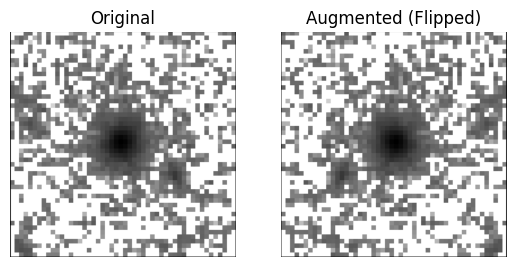

In [5]:
original = dataset["train"][0]["image"]
augmented = augmented_dataset[0]["image"]

fig, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(augmented)
ax[1].set_title("Augmented (Flipped)")
ax[1].axis("off")

plt.show()


In [6]:
dataset['train']

Dataset({
    features: ['image', 'label'],
    num_rows: 944
})

In [7]:
# labels generate from D. Maschmann paper (2024), email from D. Maschmann himself, and Whitemore paper (2021)

label_to_label = {
    "0": "1",
    "1": "4",
    "2": "4",
    "3": "4",
    "4": "4",
    "5": "2",
    "6": "3",
    "7": "4",
    "8": "4",
    "9": "4",
    "10": "4",
    "11": "4",
    "12": "4"
}

label_to_text_one = {
    "1": "globular cluster, central peak, symmetrical, slighlty more extended than point source",
    "2": "open cluster, central peak, asymmetrical, elongated, slightly more extended relative to point source",
    "3": "compact stellar association, asymmetric, multiple peaks",
    "4": "not a star cluster or compact stellar association, could be image artifacts, background galaxies, individual stars, or pairs of stars"
}

"""
label_to_text_two = {
    "1": "star cluster, central bulge, symmetrical",
    "2": "star cluster, central bulge, asymmetrical, elongated",
    "3": "stellar association, asymmetric, multiple peaks, disperesed",
    "4": "noise or other images, could be image artifacts, background galaxies, individual stars, or pairs of stars"
}
"""

label_to_label_two = {
    "0": "1",
    "1": "10",
    "2": "13",
    "3": "16",
    "4": "19",
    "5": "2",
    "6": "3",
    "7": "4",
    "8": "5",
    "9": "6",
    "10": "7",
    "11": "8",
    "12": "9"
}

label_to_text_two = {
    "0": "globular star cluster: clear peak, circularly symmetric",
    "5": "open star cluster: clear peak, elongated or asymmetric",
    "6": "stellar association: asymmetric, multiple peaks, dispersed",
    "7": "noise: star, more point source than cluster",
    "8": "noise: pair of stars, both point source, two main points",
    "9": "noise: saturated star",
    "10": "noise: redundant images, with other objects too nearby to justify additional imaging",
    "11": "noise: a diffraction spike",
    "12": "noise: background galaxy, less clear peak than cluster",
    "1": "noise: too faint to tell",
    "2": "noise: triplet stars, all point source, three main points",
    "3": "noise: fluff, no clear object, not a star cluster",
    "4": "noise: very red star"
}


In [8]:
def add_new_labels(example):
    folder_name = example["label"] 
    example["label"] = label_to_label.get(str(folder_name), "Unknown Object")
    return example

def add_new_labels_two(example):
    folder_name = example["label"]  
    example["label"] = label_to_label_two.get(str(folder_name), "Unknown Object")
    return example  

def add_text_labels_one(example):
    folder_name = example["label"]  
    example["text"] = label_to_text_one.get(str(folder_name), "Unknown Object")
    return example

def add_text_labels_two(example):
    folder_name = example["label"]  
    example["text"] = label_to_text_two.get(str(folder_name), "Unknown Object")
    return example

"""def add_text_labels_two(example):
    folder_name = example["label"]  
    example["text"] = label_to_text_two.get(str(folder_name), "Unknown Object")
    return example"""

# Apply the function

broad_dataset = dataset['train']
broad_dataset = broad_dataset.map(add_new_labels)
broad_dataset = broad_dataset.map(add_text_labels_one)

augmented_dataset = augmented_dataset.map(add_new_labels)
augmented_dataset = augmented_dataset.map(add_text_labels_one)

# Check structure
print(broad_dataset)
print(augmented_dataset)

augmented_dataset['text']

Map:   0%|          | 0/944 [00:00<?, ? examples/s]

Map:   0%|          | 0/944 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'label', 'text'],
    num_rows: 944
})
Dataset({
    features: ['image', 'label', 'text'],
    num_rows: 944
})


['globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular cluster, central peak, symmetrical, slighlty more extended than point source',
 'globular

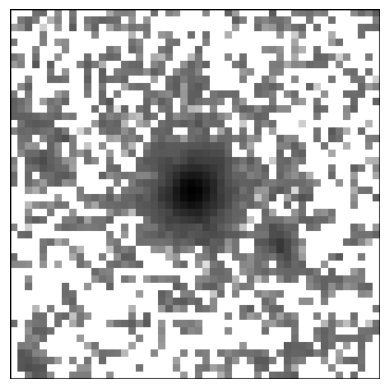

'globular cluster, central peak, symmetrical, slighlty more extended than point source'

In [9]:
image = broad_dataset[0]["image"]  


plt.imshow(image)
plt.axis("off") 
plt.show()

broad_dataset[0]['text']

In [77]:
device = "cuda" if torch.cuda.is_available() else \
         ("mps" if torch.backends.mps.is_available() else "cpu")

# Specifices version of CLIP to be used from huggingface 
model_id = "openAI/clip-vit-base-patch32"

# Loads the model, tokenizer, and processor
model = CLIPModel.from_pretrained(model_id).to(device)
tokenizer = CLIPTokenizerFast.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataset, processor):
        # dataset['train'] will be a Dataset object containing image-text pairs
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Retrieve the image and text
        image = self.dataset[idx]['image']
        text = self.dataset[idx]['text']  

        # Preprocess using CLIP processor
        inputs = self.processor(text=text, images=image, return_tensors="pt", padding="max_length", truncation=True)
        
        # Return the correct tensor format for CLIP (squeezing the batch dimension)
        return {
            "input_ids": inputs["input_ids"].squeeze(0),  
            "attention_mask": inputs["attention_mask"].squeeze(0),
            "pixel_values": inputs["pixel_values"].squeeze(0) 
        }

In [ ]:
def collate_fn(batch):
    # Ensure correct padding and stacking
    input_ids = torch.nn.utils.rnn.pad_sequence(
        [item["input_ids"] for item in batch], batch_first=True, padding_value=0
    )
    attention_mask = torch.nn.utils.rnn.pad_sequence(
        [item["attention_mask"] for item in batch], batch_first=True, padding_value=0
    )
    pixel_values = torch.stack([item["pixel_values"] for item in batch]) 

    return {
        "input_ids": input_ids,
        "attention_mask": attention_mask,
        "pixel_values": pixel_values
    }


In [80]:
train_dataset = CustomDataset(broad_dataset, processor)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)


In [81]:
import torch.optim as optim

optimizer = optim.AdamW(model.parameters(), lr=5e-6, weight_decay=1e-3)
criterion = torch.nn.CrossEntropyLoss()

In [82]:
"""from PIL import Image

for idx in range(5):
    item = train_dataset[idx]
    print(f"Item {idx}: input_ids shape: {item['input_ids'].shape}, "
          f"attention_mask shape: {item['attention_mask'].shape}, "
          f"pixel_values shape: {item['pixel_values'].shape}")"""

'from PIL import Image\n\nfor idx in range(5):\n    item = train_dataset[idx]\n    print(f"Item {idx}: input_ids shape: {item[\'input_ids\'].shape}, "\n          f"attention_mask shape: {item[\'attention_mask\'].shape}, "\n          f"pixel_values shape: {item[\'pixel_values\'].shape}")'

In [ ]:
import torch

for epoch in range(10):  
    epoch_loss = 0 
    batch_count = 0
    correct_predictions = 0
    total_samples = 0 

    for batch in train_dataloader:
        optimizer.zero_grad()

        # Forward pass
        input_ids = batch['input_ids'].squeeze(1)  
        attention_mask = batch['attention_mask'].squeeze(1)
        pixel_values = batch['pixel_values'].squeeze(1)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, pixel_values=pixel_values)

        # Contrastive loss
        logits_per_image = outputs.logits_per_image 
        logits_per_text = outputs.logits_per_text  
        labels = torch.arange(logits_per_image.size(0)).to(logits_per_image.device)

        loss_image = torch.nn.CrossEntropyLoss()(logits_per_image, labels)
        loss_text = torch.nn.CrossEntropyLoss()(logits_per_text, labels)
        loss = (loss_image + loss_text) / 2

        # Backward pass
        loss.backward()
        optimizer.step()

        # Track loss
        epoch_loss += loss.item()

        # Compute accuracy
        predictions = torch.argmax(logits_per_image, dim=1)  
        correct_predictions += (predictions == labels).sum().item()
        total_samples += labels.size(0)
        
        batch_count += 1

    avg_loss = epoch_loss / batch_count
    accuracy = (correct_predictions / total_samples) * 100

    print(f"Epoch [{epoch+1}/10] Completed, Average Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch [1/10] Completed, Average Loss: 1.8866, Accuracy: 22.99%
Epoch [2/10] Completed, Average Loss: 1.6935, Accuracy: 28.39%
Epoch [3/10] Completed, Average Loss: 1.6291, Accuracy: 27.22%
Epoch [4/10] Completed, Average Loss: 1.5011, Accuracy: 31.99%
Epoch [5/10] Completed, Average Loss: 1.3812, Accuracy: 34.96%
Epoch [6/10] Completed, Average Loss: 1.2929, Accuracy: 37.71%
Epoch [7/10] Completed, Average Loss: 1.1390, Accuracy: 40.57%
Epoch [8/10] Completed, Average Loss: 1.1529, Accuracy: 40.04%
Epoch [9/10] Completed, Average Loss: 1.0696, Accuracy: 42.06%
Epoch [10/10] Completed, Average Loss: 1.0790, Accuracy: 40.25%


In [86]:

model.save_pretrained("fine_tuned_clip_model")
processor.save_pretrained("fine_tuned_clip_model")



[]

In [10]:
device = "cuda" if torch.cuda.is_available() else \
         ("mps" if torch.backends.mps.is_available() else "cpu")

# Specifices version of CLIP to be used from huggingface 
model_id = "openAI/clip-vit-base-patch32"

# Loads the model, tokenizer, and processor
model = CLIPModel.from_pretrained("fine_tuned_clip_model").to(device)
tokenizer = CLIPTokenizerFast.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained("fine_tuned_clip_model")

In [11]:
class CustomDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Retrieve the image and text
        image = self.dataset[idx]['image']
        text = self.dataset[idx]['text']  

        # Preprocess using CLIP processor
        inputs = self.processor(text=text, images=image, return_tensors="pt", padding="max_length", truncation=True)
        
        # Return the correct tensor format for CLIP (squeezing the batch dimension)
        return {
            "input_ids": inputs["input_ids"].squeeze(0),  
            "attention_mask": inputs["attention_mask"].squeeze(0),
            "pixel_values": inputs["pixel_values"].squeeze(0)  
        }

In [12]:
def collate_fn(batch):
    # Ensure correct padding and stacking
    input_ids = torch.nn.utils.rnn.pad_sequence(
        [item["input_ids"] for item in batch], batch_first=True, padding_value=0
    )
    attention_mask = torch.nn.utils.rnn.pad_sequence(
        [item["attention_mask"] for item in batch], batch_first=True, padding_value=0
    )
    pixel_values = torch.stack([item["pixel_values"] for item in batch])  # Stack images into a batch

    return {
        "input_ids": input_ids,
        "attention_mask": attention_mask,
        "pixel_values": pixel_values
    }


In [13]:
augmented_train_dataset = CustomDataset(augmented_dataset, processor)
augmented_train_dataloader = DataLoader(augmented_train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

In [14]:
import torch.optim as optim

optimizer = optim.AdamW(model.parameters(), lr=5e-6, weight_decay=1e-3)
criterion = torch.nn.CrossEntropyLoss()

In [15]:
import torch

for epoch in range(10):
    epoch_loss = 0  
    batch_count = 0
    correct_predictions = 0 
    total_samples = 0  

    for batch in augmented_train_dataloader:
        optimizer.zero_grad()

        # Forward pass
        input_ids = batch['input_ids'].squeeze(1)  
        attention_mask = batch['attention_mask'].squeeze(1)
        pixel_values = batch['pixel_values'].squeeze(1)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, pixel_values=pixel_values)

        # Contrastive loss
        logits_per_image = outputs.logits_per_image  
        logits_per_text = outputs.logits_per_text  
        labels = torch.arange(logits_per_image.size(0)).to(logits_per_image.device)

        loss_image = torch.nn.CrossEntropyLoss()(logits_per_image, labels)
        loss_text = torch.nn.CrossEntropyLoss()(logits_per_text, labels)
        loss = (loss_image + loss_text) / 2

        # Backward pass
        loss.backward()
        optimizer.step()

        # Track loss
        epoch_loss += loss.item()

        # Compute accuracy
        predictions = torch.argmax(logits_per_image, dim=1) 
        correct_predictions += (predictions == labels).sum().item()
        total_samples += labels.size(0)
        
        batch_count += 1

    avg_loss = epoch_loss / batch_count
    accuracy = (correct_predictions / total_samples) * 100

    print(f"Epoch [{epoch+1}/10] Completed, Average Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch [1/10] Completed, Average Loss: 1.6324, Accuracy: 29.56%
Epoch [2/10] Completed, Average Loss: 1.4319, Accuracy: 33.37%
Epoch [3/10] Completed, Average Loss: 1.2445, Accuracy: 37.92%
Epoch [4/10] Completed, Average Loss: 1.1383, Accuracy: 39.83%
Epoch [5/10] Completed, Average Loss: 1.1474, Accuracy: 39.62%
Epoch [6/10] Completed, Average Loss: 1.1080, Accuracy: 40.36%
Epoch [7/10] Completed, Average Loss: 1.0736, Accuracy: 40.89%
Epoch [8/10] Completed, Average Loss: 1.0414, Accuracy: 41.84%
Epoch [9/10] Completed, Average Loss: 1.0381, Accuracy: 42.06%
Epoch [10/10] Completed, Average Loss: 1.0742, Accuracy: 41.42%


In [16]:

model.save_pretrained("fine_tuned_clip_model_two")
processor.save_pretrained("fine_tuned_clip_model_two")


[]